In [57]:
! pip3 install seaborn -U

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.10.0)


In [58]:
# import library
import pandas as pd
import requests
import tweepy
import os
import numpy as np

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# load cleaned CSV
df = pd.read_csv('twitter_archive_master.csv')

In [60]:
df

,display_text_range,favorite_count,full_text,id,retweet_count,source_x,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not
0,"[0, 138]",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,Twitter for iPhone,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,"[0, 121]",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,Twitter for iPhone,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2,"[0, 138]",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,Twitter for iPhone,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
3,"[0, 138]",20562,Here we have a majestic great white breaching ...,891087950875897856,3261,Twitter for iPhone,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True
4,"[0, 140]",12041,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2158,Twitter for iPhone,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
5,"[0, 118]",56848,When you watch your owner call another dog a g...,890729181411237888,16716,Twitter for iPhone,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
6,"[0, 122]",28226,This is Zoey. She doesn't want to be one of th...,890609185150312448,4429,Twitter for iPhone,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True
7,"[0, 133]",32467,This is Cassie. She is a college pup. Studying...,890240255349198849,7711,Twitter for iPhone,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,Doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True
8,"[0, 130]",31166,This is Koda. He is a South Australian decksha...,890006608113172480,7624,Twitter for iPhone,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True
9,"[0, 107]",28268,This is Bruno. He is a service shark. Only get...,889880896479866881,5156,Twitter for iPhone,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True


In [61]:
# convert type of "timestamp"
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [62]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 18 columns):
display_text_range    1189 non-null object
favorite_count        1189 non-null int64
full_text             1189 non-null object
id                    1189 non-null int64
retweet_count         1189 non-null int64
source_x              1189 non-null object
timestamp             1189 non-null datetime64[ns]
text                  1189 non-null object
expanded_urls         1189 non-null object
rating_numerator      1189 non-null int64
rating_denominator    1189 non-null int64
name                  1189 non-null object
dog_type              192 non-null object
jpg_url               1189 non-null object
img_num               1189 non-null int64
Prediction            1189 non-null object
Confidence            1189 non-null float64
Dog_or_not            1189 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 159.2+ KB


# Analyze

### (1) Is there a relationship between rate of WeRateDogs and fav, rtwt?

(0.0, 20.0)

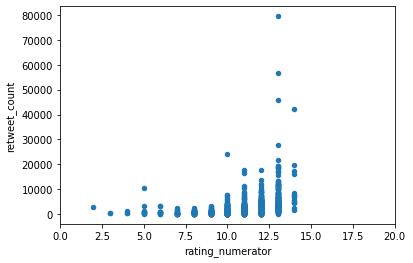

In [63]:
# plot numerator vs. retweet count
df.plot.scatter(x='rating_numerator', y='retweet_count')
plt.xlim([0,20])

(0.0, 20.0)

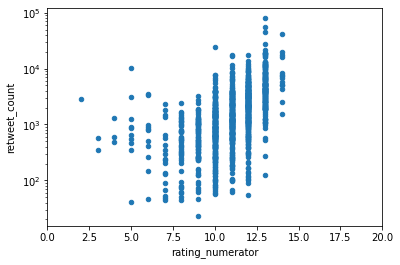

In [64]:
# plot numerator vs. retweet count in log
df.plot.scatter(x='rating_numerator', y='retweet_count', logy=True)
plt.xlim([0,20])

(0.0, 20.0)

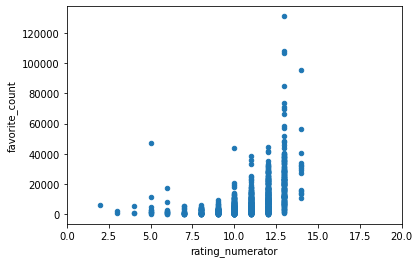

In [65]:
df.plot.scatter(x='rating_numerator', y='favorite_count')
plt.xlim([0,20])

(0.0, 20.0)

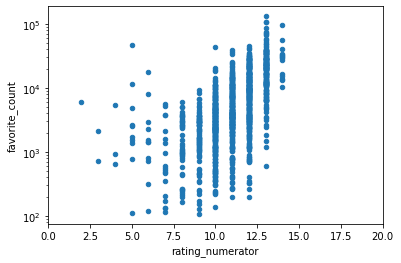

In [66]:
df.plot.scatter(x='rating_numerator', y='favorite_count',logy=True)
plt.xlim([0,20])

## Insight 1 : There are relationships between both rate of WeRateDogs and fav, rtwt.

### (2)What type of dog is most favorited and retweeted?

In [67]:
top20 = df.sort_values('retweet_count', ascending=False)[0:20]['id'].values
for i in range(len(top20)):
    print(i)
    print(df[df['id'] == top20[i]]['retweet_count'].values[0])
    print(df[df['id'] == top20[i]]['dog_type'].values[0])
    print(df[df['id'] == top20[i]]['Prediction'].values[0])

0
79515
Doggo
Labrador_retriever
1
56625
nan
Chihuahua
2
45849
nan
English_springer
3
42228
Doggo
standard_poodle
4
27680
nan
golden_retriever
5
24319
nan
Labrador_retriever
6
21840
nan
chow
7
19669
Puppo
Rottweiler
8
19297
nan
Labrador_retriever
9
19196
Puppo
flat-coated_retriever
10
18781
nan
Pembroke
11
18627
nan
boxer
12
18497
Floofer
Samoyed
13
17621
Pupper
golden_retriever
14
17605
nan
Great_Pyrenees
15
17300
nan
Chesapeake_Bay_retriever
16
17209
Pupper
Pomeranian
17
16716
nan
Pomeranian
18
16628
nan
golden_retriever
19
16267
nan
French_bulldog


(-1.0, 10.0)

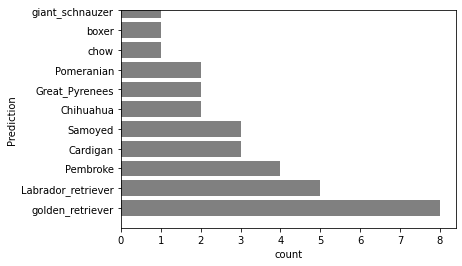

In [68]:
top50 = df.sort_values('retweet_count', ascending=False)[0:50]
ax = sns.countplot(y="Prediction", data=top50, color="gray", order = top50['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 10.0)

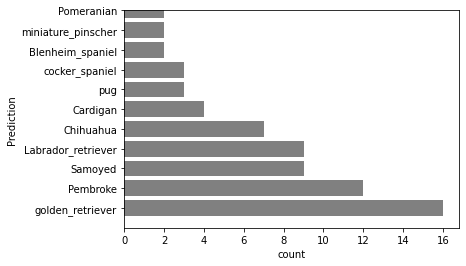

In [69]:
top100 = df.sort_values('retweet_count', ascending=False)[0:100]
ax = sns.countplot(y="Prediction", data=top100, color="gray", order = top100['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 10.0)

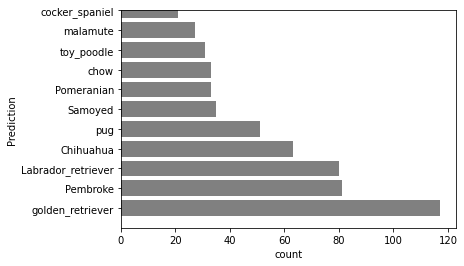

In [70]:
sns.countplot(y="Prediction", data=df, color="gray", order = df['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 4.0)

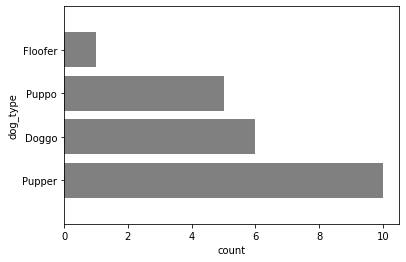

In [71]:
top100 = df.sort_values('retweet_count', ascending=False)[0:100]
sns.countplot(y="dog_type", data=top100, color="gray", order = top100['dog_type'].value_counts().index)
plt.ylim([-1,4])

(0.0, 25000.0)

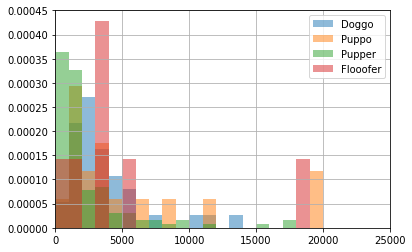

In [72]:
ax = df[df['dog_type']=='Doggo']['retweet_count'].hist(alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Puppo']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Pupper']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Floofer']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
ax.legend(['Doggo', 'Puppo', 'Pupper', 'Flooofer'])
plt.xlim([0, 25000])

(0.0, 20.0)

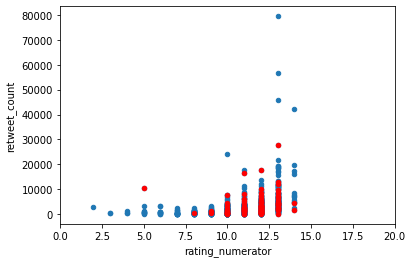

In [73]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["Prediction"] == "golden_retriever"].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20.0)

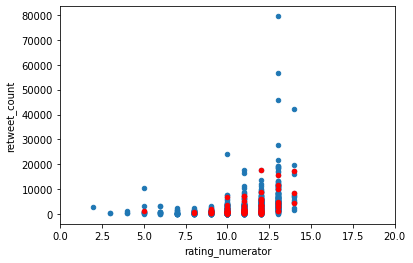

In [74]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["dog_type"] == 'Pupper'].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20.0)

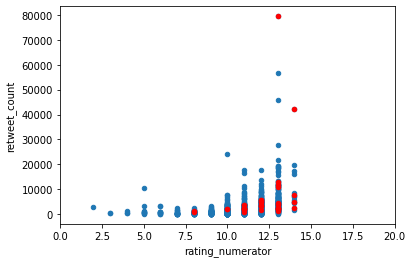

In [75]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["dog_type"] == 'Doggo'].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20000.0)

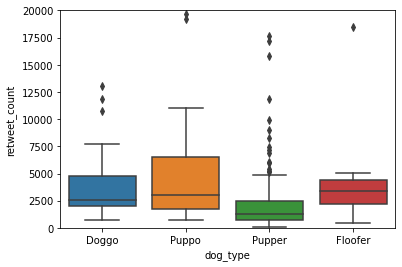

In [76]:
sns.boxplot(data=df, y='retweet_count', x='dog_type')
plt.ylim([0, 20000])

In [77]:
top20 = df.sort_values('favorite_count', ascending=False)[0:20]['id'].values
for i in range(len(top20)):
    print(i)
    print(df[df['id'] == top20[i]]['favorite_count'].values[0])
    print(df[df['id'] == top20[i]]['dog_type'].values[0])
    print(df[df['id'] == top20[i]]['Prediction'].values[0])

0
131075
Doggo
Labrador_retriever
1
107956
nan
English_springer
2
107015
nan
Chihuahua
3
95450
Doggo
standard_poodle
4
85011
nan
golden_retriever
5
73397
nan
Labrador_retriever
6
71144
nan
Chesapeake_Bay_retriever
7
69871
nan
Pembroke
8
66437
nan
chow
9
58302
nan
boxer
10
56848
nan
Pomeranian
11
56413
Puppo
Rottweiler
12
51522
nan
Saluki
13
48410
Doggo
golden_retriever
14
47844
Puppo
flat-coated_retriever
15
46860
nan
golden_retriever
16
45880
nan
golden_retriever
17
44619
Pupper
golden_retriever
18
43710
nan
Pembroke
19
43694
nan
Labrador_retriever


(-1.0, 10.0)

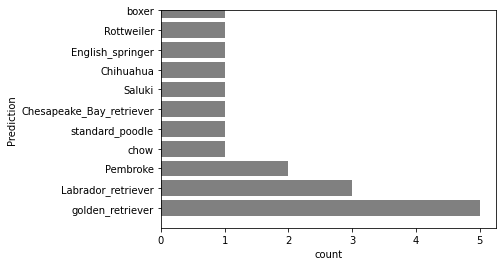

In [78]:
top20 = df.sort_values('favorite_count', ascending=False)[0:20]
ax = sns.countplot(y="Prediction", data=top20, color="gray", order = top20['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 10.0)

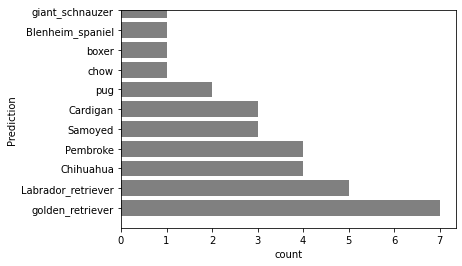

In [79]:
top50 = df.sort_values('favorite_count', ascending=False)[0:50]
ax = sns.countplot(y="Prediction", data=top50, color="gray", order = top50['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 10.0)

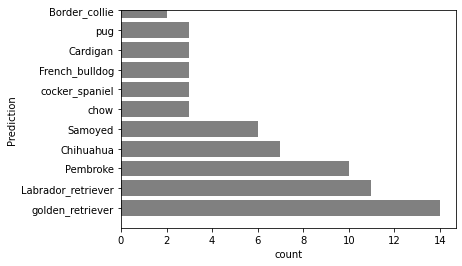

In [80]:
top100 = df.sort_values('favorite_count', ascending=False)[0:100]
ax = sns.countplot(y="Prediction", data=top100, color="gray", order = top100['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 4.0)

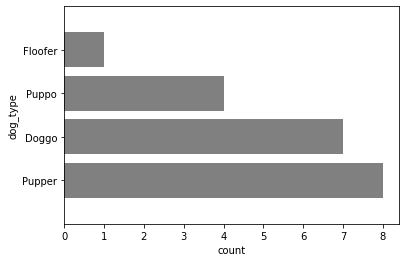

In [81]:
top100 = df.sort_values('favorite_count', ascending=False)[0:100]
sns.countplot(y="dog_type", data=top100, color="gray", order = top100['dog_type'].value_counts().index)
plt.ylim([-1, 4])

(-1.0, 10.0)

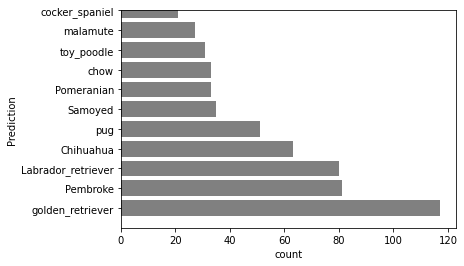

In [82]:
sns.countplot(y="Prediction", data=df, color="gray", order = df['Prediction'].value_counts().index)
plt.ylim([-1, 10])

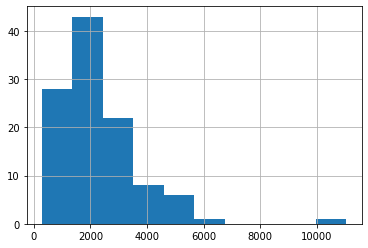

In [83]:
df.groupby('Prediction').mean()['retweet_count'].hist()

In [84]:
df_dog = df.groupby('Prediction').mean()

In [85]:
df_dog.sort_values(by='retweet_count', ascending=False).head()

,favorite_count,id,retweet_count,rating_numerator,rating_denominator,img_num,Confidence,Dog_or_not
Prediction,,,,,,,,
standard_poodle,25605.250000,7.346953e+17,11042.500000,11.000000,10.0,1.0,0.511018,True
English_springer,15657.222222,7.204467e+17,5973.555556,11.111111,10.0,1.0,0.546486,True
Afghan_hound,17305.000000,8.413147e+17,5312.000000,13.000000,10.0,1.0,0.903712,True
giant_schnauzer,17314.500000,7.566625e+17,5161.500000,11.500000,10.0,1.0,0.593866,True
Saluki,24060.000000,8.315403e+17,5133.750000,12.500000,10.0,1.0,0.523054,True


In [86]:
df[df['Prediction'] == 'standard_poodle']

,display_text_range,favorite_count,full_text,id,retweet_count,source_x,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not
215,"[0, 83]",95450,This is Bo. He was a very good First Doggo. 14...,819004803107983360,42228,Twitter for iPhone,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,Doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True
420,"[0, 106]",4957,Meet Bonaparte. He's pupset because it's cloud...,761292947749015552,1265,Twitter for iPhone,2016-08-04 20:09:17,Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,NaN,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True
776,"[0, 103]",1561,This is Covach. He's trying to melt the snow. ...,689999384604450816,424,Twitter for iPhone,2016-01-21 02:34:07,This is Covach. He's trying to melt the snow. ...,https://twitter.com/dog_rates/status/689999384...,10,10,Covach,NaN,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True
1120,"[0, 137]",453,Good teamwork between these dogs. One is on lo...,668484198282485761,253,Twitter for iPhone,2015-11-22 17:40:27,Good teamwork between these dogs. One is on lo...,https://twitter.com/dog_rates/status/668484198...,9,10,None,NaN,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True


In [87]:
df[df['Prediction'] == 'standard_poodle']['expanded_urls'].values[0]

'https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1'

In [88]:
df_dog.index

Index(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
       'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
       'Border_terrier',
       ...
       'schipperke', 'silky_terrier', 'soft-coated_wheaten_terrier',
       'standard_poodle', 'standard_schnauzer', 'toy_poodle', 'toy_terrier',
       'vizsla', 'whippet', 'wire-haired_fox_terrier'],
      dtype='object', name='Prediction', length=109)

(-1.0, 4.0)

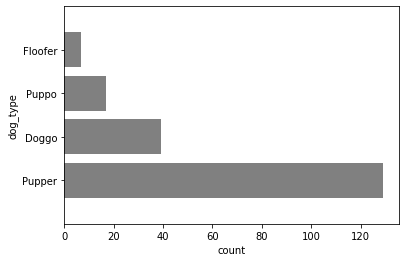

In [89]:
sns.countplot(y="dog_type", data=df, color="gray", order = df['dog_type'].value_counts().index)
plt.ylim([-1, 4])

(0.0, 25000.0)

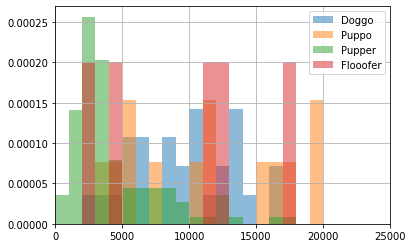

In [90]:
ax = df[df['dog_type']=='Doggo']['favorite_count'].hist(alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Puppo']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Pupper']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Floofer']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
ax.legend(['Doggo', 'Puppo', 'Pupper', 'Flooofer'])
plt.xlim([0, 25000])

(0.0, 20.0)

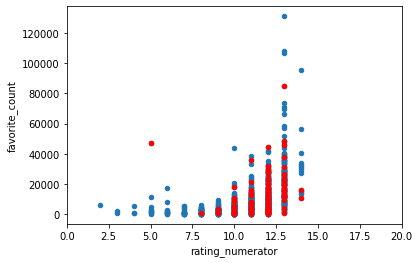

In [91]:
ax = df.plot.scatter(x='rating_numerator', y='favorite_count')
df[df["Prediction"] == "golden_retriever"].plot.scatter(x='rating_numerator', y='favorite_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 50000.0)

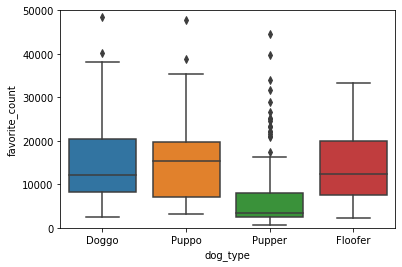

In [92]:
sns.boxplot(data=df, y='favorite_count', x='dog_type')
plt.ylim([0, 50000])

## Pupper tends not to be favorited and retweeted...

### (3)When we tweet if want to get more fav and retwt?

In [93]:
df['hour'] = 0
for i in range(len(df)):
    df.loc[i,'hour'] = df.loc[i, 'timestamp'].hour

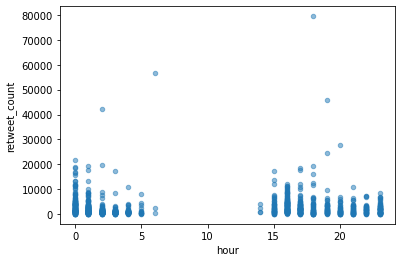

In [94]:
df.plot.scatter(x='hour', y='retweet_count', alpha=0.5)

(0.0, 60000.0)

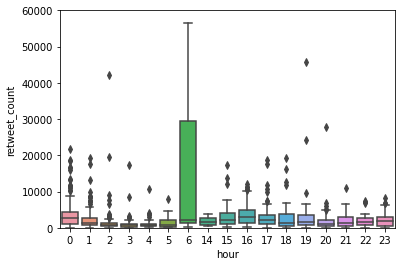

In [95]:
sns.boxplot(data=df, y='retweet_count', x='hour')
plt.ylim([0, 60000])

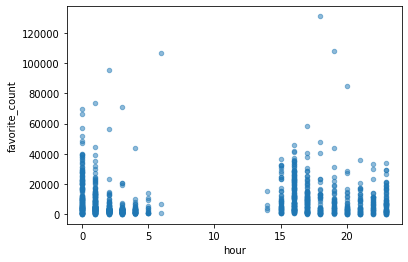

In [96]:
df.plot.scatter(x='hour', y='favorite_count', alpha=0.5)

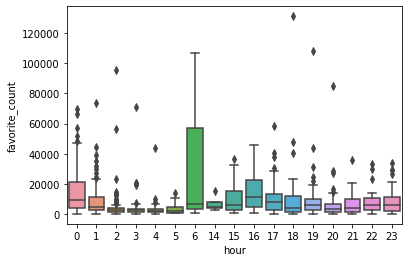

In [97]:
sns.boxplot(data=df, y='favorite_count', x='hour')
# plt.ylim([0, 70000])

## If you want to get more favorite and retweet, you should tweet around 4 p.m. or 0 a.m..

### (4) Which media, photo ore video is more preferd?

In [98]:
df[df['hour'] == 6]['expanded_urls'].values[0]

'https://twitter.com/dog_rates/status/807106840509214720/video/1'

In [99]:
df['media'] = 'photo'

In [100]:
for i in range(len(df)):
    if(df['expanded_urls'].values[i][-7:-2] == 'video'):
        df.loc[i, 'media'] = 'video'

In [101]:
df[df['media'] == 'video']

,display_text_range,favorite_count,full_text,id,retweet_count,source_x,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not,hour,media
13,"[0, 138]",25652,This is Oliver. You're witnessing one of his m...,889278841981685760,5637,Twitter for iPhone,2017-07-24 00:19:32,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,0,video
20,"[0, 88]",34222,You may not have known you needed to see this ...,887343217045368832,10737,Twitter for iPhone,2017-07-18 16:08:03,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,16,video
46,"[0, 82]",107956,This is Duddles. He did an attempt. 13/10 some...,879415818425184262,45849,Twitter for iPhone,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,19,video
90,"[0, 91]",15935,This is Neptune. He's a backpup vocalist for t...,863553081350529029,4489,Twitter for iPhone,2017-05-14 00:34:33,This is Neptune. He's a backpup vocalist for t...,https://twitter.com/dog_rates/status/863553081...,13,10,Neptune,NaN,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,0,video
144,"[0, 127]",17305,This is Max. There's no way in h*ck you're tak...,841314665196081154,5312,Twitter Web Client,2017-03-13 15:47:01,This is Max. There's no way in h*ck you're tak...,https://twitter.com/dog_rates/status/841314665...,13,10,Max,NaN,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan_hound,0.903712,True,15,video
174,"[0, 60]",8735,Say hello to Reggie. He hates puns. 12/10 ligh...,830956169170665475,1735,Twitter for iPhone,2017-02-13 01:46:03,Say hello to Reggie. He hates puns. 12/10 ligh...,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,NaN,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,1,video
210,"[0, 114]",13075,This is Sundance. He's a doggo drummer. Even s...,821407182352777218,5053,Twitter for iPhone,2017-01-17 17:21:47,This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,Irish_setter,0.505496,True,17,video
211,"[0, 62]",9718,This is Luca. He got caught howling. H*ckin em...,821149554670182400,2320,Twitter for iPhone,2017-01-17 00:18:04,This is Luca. He got caught howling. H*ckin em...,https://twitter.com/dog_rates/status/821149554...,12,10,Luca,NaN,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,0,video
220,"[0, 140]",11901,"This is Dido. She's playing the lead role in ""...",817777686764523521,3084,Twitter for iPhone,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True,16,video
229,"[0, 57]",25057,Here's a pupper with squeaky hiccups. Please e...,815966073409433600,9907,Twitter for iPhone,2017-01-02 17:00:46,Here's a pupper with squeaky hiccups. Please e...,https://twitter.com/dog_rates/status/815966073...,13,10,None,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,17,video


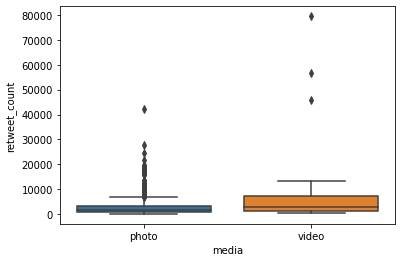

In [102]:
sns.boxplot(data=df, y='retweet_count', x='media')
# plt.ylim([0, 20000])

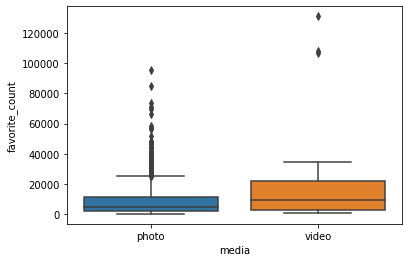

In [103]:
sns.boxplot(data=df, y='favorite_count', x='media')
# plt.ylim([0, 40000])

### Video.